In [1]:
import numpy as np
import pandas as pd

from scipy import stats

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure

<h2>Reading the Data</h2>

In [2]:
raw=pd.read_csv('product_identifiers.csv')
data=raw.sort_values(by=['energy_per_100g'])

<h2>Assign Index for Future Reference</h2>

In [3]:
data=data.dropna(subset=['Final Generic Product'])
data['IDX Final Generic Product'] =data['Final Generic Product'].factorize()[0]

In [4]:
data

,Retailer,Identifier,Identifier without -,URL,article_number,Product name,MATCH(1),MATCH(2),MATCH(3),Matched UUID,...,Ingredients,Food Processing,Stocking/Storage,Inside Packaging,Food Preperation,Generic_product_name,German translation (Generic product name only),Final Generic Product,Final Generic Product (only classification),IDX Final Generic Product
23230,Interspar,NaN,NaN,https://www.interspar.at/shop/lebensmittel/aia...,2020001920112,Aia Hendl Brustschnitzel Roma,NaN,25143aa881cf4dccbc4643d336b940d4,25143aa881cf4dccbc4643d336b940d4,25143aa881cf4dccbc4643d336b940d4,...,NaN,prepared,refrigerated,NaN,NaN,NaN,NaN,Chicken - prepared - refrigerated,Chicken - prepared - refrigerated,0
5639,Interspar,6c5fbc1b-8502-4b3b-9751-5eb9c682a183,6c5fbc1b85024b3b97515eb9c682a183,NaN,NaN,Aia Chicken Salad,6c5fbc1b85024b3b97515eb9c682a183,NaN,6c5fbc1b85024b3b97515eb9c682a183,6c5fbc1b85024b3b97515eb9c682a183,...,chicken,NaN,refrigerated,NaN,NaN,NaN,NaN,Ready made-Salads - Meat others - chicken - re...,Ready made-Salads - Meat others - chicken - re...,1
10725,Interspar,NaN,NaN,https://www.interspar.at/shop/lebensmittel/kek...,5051083,Kekserei Cantuccini,NaN,e0fa2cd5d85b4c4aa9ecb7fba761e625,e0fa2cd5d85b4c4aa9ecb7fba761e625,e0fa2cd5d85b4c4aa9ecb7fba761e625,...,nuts,NaN,NaN,NaN,NaN,NaN,NaN,Cookies with nuts - nuts,Cookies with nuts - nuts,2
22758,Interspar,NaN,NaN,https://www.interspar.at/shop/lebensmittel/bul...,2020003135958,Bullrich Lutsch-Tabletten Säure–Basen–Balance ...,NaN,bf5b635622ca41449ec602f8657de905,NaN,bf5b635622ca41449ec602f8657de905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Random Category,Random Category,3
23244,Interspar,NaN,NaN,https://www.interspar.at/shop/lebensmittel/aia...,2020001920150,Aia Putenschnitzel hauchdünn,NaN,c9ff85f922cb48f4b420898d75f87b34,c9ff85f922cb48f4b420898d75f87b34,c9ff85f922cb48f4b420898d75f87b34,...,NaN,raw,refrigerated,NaN,NaN,NaN,NaN,Turkey - raw - refrigerated,Turkey - raw - refrigerated,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29429,Hofer,003-2764,0032764,https://drive.google.com/file/d/10pGcMXf7-1u5c...,view,Kaubonbons mit Tattoo Cola,NaN,NaN,NaN,NaN,...,others,NaN,NaN,NaN,NaN,NaN,NaN,Sugar Candy - Others - others,Sugar Candy - Others - others,1429
29430,Hofer,003-2765,0032765,https://drive.google.com/file/d/10pGcMXf7-1u5c...,view,Kaubonbons mit Tattoo Erdbeere,NaN,NaN,NaN,NaN,...,fruits,NaN,NaN,NaN,NaN,NaN,NaN,Sugar Candy - Others - fruits,Sugar Candy - Others - fruits,1460
29431,Hofer,003-2766,0032766,https://drive.google.com/file/d/10pGcMXf7-1u5c...,view,Maoween,NaN,NaN,NaN,NaN,...,fruits,NaN,NaN,NaN,NaN,NaN,NaN,Sugar Candy - Others - fruits,Sugar Candy - Others - fruits,1460
29432,Hofer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,sausage,refrigerated,NaN,NaN,NaN,NaN,Calf - sausage - refrigerated,Calf - sausage - refrigerated,2734


<h2>Each Group in Each Attribute</h2>

In [5]:
data.groupby('Class/Brick')['Product name'].nunique()

Class/Brick
#Prepared Meal - Meat; Prepared Meal - Meat Others      1
#baking mixture - oat based                             1
#baking mixture - spelt based                           1
AUT Fruits; Apples                                     47
AUT Fruits; Apricots                                   14
                                                     ... 
Yoghurt (Cow); Fruit Yoghurt (Cow)                    219
Yoghurt (Cow); Natural Yoghurt (Cow)                   91
Yoghurt (Goat); Natural Yoghurt (Goat)                  3
Yoghurt (Sheep); Fruit Yoghurt (Sheep)                  5
Yoghurt (Sheep); Natural Yoghurt (Sheep)                5
Name: Product name, Length: 875, dtype: int64

In [6]:
data.groupby('Generic_product_name')['Product name'].nunique()

Generic_product_name
 Meat with Dumplings                 2
 Substitute - Coconut Rice Drink     1
 Vegetables with Quinoa              1
Advocaat                             1
Agar-agar (sheets)                   1
                                    ..
Yeast Dumpling                       6
Yeast Dumplings                      2
Yoghurt with Chocolate               6
Yoghurt with Coffee                  6
Yoghurt with Vanilla                17
Name: Product name, Length: 497, dtype: int64

In [69]:
fgb_group=data.groupby('Final Generic Product')['Product name'].nunique()
fgb_group_df=pd.DataFrame(fgb_group)
fgb_group_df[fgb_group_df['Product name']<4]
# fgb_group_df
# fgb_group_df

,Product name
Final Generic Product,
Meat with Dumplings - pork - frozen,1
Meat with Dumplings - pork - refrigerated,1
Substitute - Coconut Rice Drink - coconut - shelfstable,1
Vegetables with Quinoa - plain - frozen,1
(Double) Cream (Cow),1
...,...
Yoghurt with Vanilla - lactose-free - refrigerated,1
Zander - prepared-processed - frozen,2
Zander - unprepared-unprocessed - frozen,3


In [8]:
data.groupby('Final Generic Product (only classification)')['Product name'].nunique()

Final Generic Product (only classification)
(Double) Cream (Cow)                                   1
(Double) Cream (Cow) - lactose-free - refrigerated     2
(Double) Cream (Cow) - with lactose                    0
(Double) Cream (Cow) - with lactose - refrigerated    50
(Double) Cream (Cow) - with lactose - shelfstable     11
                                                      ..
Zander - prepared-processed - frozen                   2
Zander - unprepared-unprocessed - frozen               3
Zander - unprepared-unprocessed - refrigerated         1
Zucchini - raw - shelfstable                           7
chokeberry - raw - shelfstable                         1
Name: Product name, Length: 2123, dtype: int64

In [9]:
data.groupby('Ingredients')['Product name'].nunique()

Ingredients
 fish                       3
 noodle based soup-add     55
#                          12
# lentils                   2
#cereals                    1
                         ... 
with pork beef              5
with seeds                  3
with vegetables            11
without dairy              18
without egg               226
Name: Product name, Length: 162, dtype: int64

In [10]:
data.groupby('Food Preperation')['Product name'].nunique()

Food Preperation
baking     147
cooking     20
ready      603
Name: Product name, dtype: int64

In [11]:
data.groupby('Stocking/Storage')['Product name'].nunique()

Stocking/Storage
#                  1
canned             2
frozen          1155
refrigerated    4684
shelfstable     4769
Name: Product name, dtype: int64

In [12]:
data.groupby('Food Processing')['Product name'].nunique()

Food Processing
#                                          3
#based on lentil, rice and pea flour       1
Refined-grain                             49
Whole-grain                                8
barn                                      26
canned                                   151
concentrate                              139
direct                                   151
dried                                    244
flakes                                    33
flour                                     74
free-range                                18
gluten-free                               17
grain                                    183
granulate                                 14
instant                                  199
legume-based                               1
lemonade                                  84
liquid                                     7
mixed with others                          1
nectar                                    24
organic                                

<h2>NaN Values in Each Attribute</h2>

In [13]:
len(raw)-len(raw[raw['energy_per_100g'].isna()])

15708

In [14]:
len(raw[raw['net_weight'].isna()])

9578

In [15]:
len(raw[raw['energy_per_100g'].isna()])

14437

In [16]:
len(raw[raw['Class/Brick'].isna()])

2494

In [17]:
len(raw[raw['Generic_product_name'].isna()])

28188

In [18]:
len(raw[raw['Final Generic Product'].isna()])

2608

In [19]:
len(raw[raw['Final Generic Product (only classification)'].isna()])

2609

<h2>Energy Range for Each <i>Final Generic Product</i></h2>

In [20]:
fgp_data=data[['Product name','energy_per_100g','Final Generic Product']]
fgb_ana=fgp_data.groupby(by=['Final Generic Product'])['energy_per_100g'].unique()
fgb=pd.DataFrame(fgb_ana)

In [21]:
def minmax(para,df,col):
    if all(np.isnan(df[col])):
        return np.nan
    else:
        temp=df[col]
        temp1=temp[~np.isnan(temp)]
        if para == 'min':
            return temp1.min()
        elif para == 'max':
            return temp1.max()
        elif para=='med':
            return np.median(temp1)
        elif para =='mean':
            if len(temp1)<2:
                return temp1.min()
            else:
                return np.mean(temp1)
        elif para =='range':
            return temp1.max()-temp1.min()
        elif para=='std':
            if len(temp1)<2:
                return 0
            else:
                return np.std(temp1)

In [22]:
fgb['Number of Products']=fgb.apply(lambda fgb:len(fgb['energy_per_100g']),axis=1)
fgb['Min']=fgb.apply(lambda fgb:minmax('min',fgb,'energy_per_100g'),axis=1)
fgb['Max']=fgb.apply(lambda fgb:minmax('max',fgb,'energy_per_100g'),axis=1)
fgb['Median']=fgb.apply(lambda fgb:minmax('med',fgb,'energy_per_100g'),axis=1)
fgb['Mean']=fgb.apply(lambda fgb:minmax('mean',fgb,'energy_per_100g'),axis=1)
fgb['Range']=fgb.apply(lambda fgb:minmax('range',fgb,'energy_per_100g'),axis=1)
fgb['Std']=fgb.apply(lambda fgb:minmax('std',fgb,'energy_per_100g'),axis=1)

In [23]:
fgb=fgb.sort_values(by=['Std'],ascending=False)
fgb=fgb.reset_index()

In [24]:
fgb.to_csv('[Overview] Final Generic Product Analysis.csv')

<h2>Visualising Energy Range</h2>

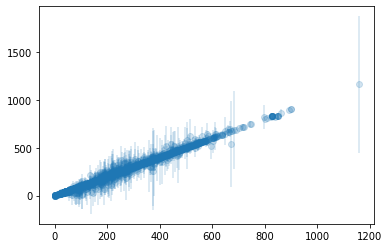

In [25]:
x=fgb['Mean'].to_numpy()
y=fgb['Median'].to_numpy()
e=fgb['Std']
# figure(figsize(10,8),dpi=80)
plt.errorbar(x,y,yerr=e,fmt='o',alpha=0.2)
plt.show()

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Range', ylabel='Std'>

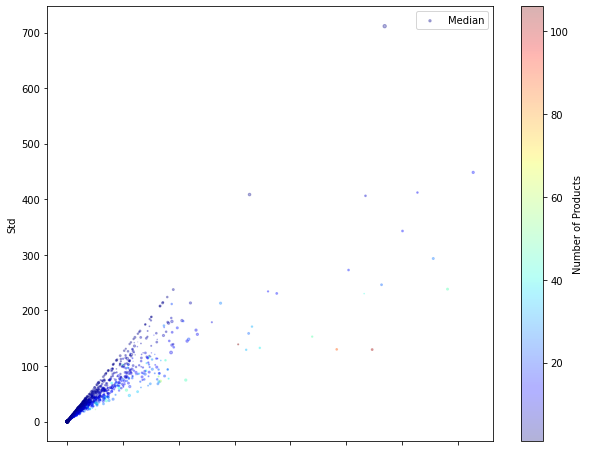

In [26]:
fgb.plot(kind='scatter',x='Range',y='Std',alpha=0.3,
        s=fgb['Median']/100,label='Median',figsize=(10,8),
        c='Number of Products',cmap=plt.get_cmap('jet'),colorbar=True)

<h2>Analysing Energy Range - Detecting Outliers</h2>

In [27]:
def outlier(df,para):
    temp=df
    mean=temp['Mean']
    std=temp['Std']
    distance_from_mean=abs(temp['energy_per_100g']-mean)
    max_deviation=2
    not_outlier=distance_from_mean<max_deviation*std
    if para=='outlier':        
        res=temp['energy_per_100g'][~not_outlier]
        res=res[~np.isnan(res)]
    elif para=='wo_outlier':
        res=temp['energy_per_100g'][not_outlier]
        res=res[~np.isnan(res)]
    return res

In [28]:
fgb_out=fgb
fgb_out['Outlier Energy']=fgb_out.apply(lambda fgb_out:outlier(fgb_out,'outlier'),axis=1)
fgb_out['Without Outlier Energy']=fgb_out.apply(lambda fgb_out:outlier(fgb_out,'wo_outlier'),axis=1)

In [29]:
fgb_out['W/O Outlier Min']=fgb_out.apply(lambda fgb_out:minmax('min',fgb_out,'Without Outlier Energy'),axis=1)
fgb_out['W/O Outlier Max']=fgb_out.apply(lambda fgb_out:minmax('max',fgb_out,'Without Outlier Energy'),axis=1)
fgb_out['W/O Outlier Median']=fgb_out.apply(lambda fgb_out:minmax('med',fgb_out,'Without Outlier Energy'),axis=1)
fgb_out['W/O Outlier Mean']=fgb_out.apply(lambda fgb_out:minmax('mean',fgb_out,'Without Outlier Energy'),axis=1)
fgb_out['W/O Outlier Range']=fgb_out.apply(lambda fgb_out:minmax('range',fgb_out,'Without Outlier Energy'),axis=1)
fgb_out['W/O Outlier Std']=fgb_out.apply(lambda fgb_out:minmax('std',fgb_out,'Without Outlier Energy'),axis=1)

In [30]:
fgb_out.to_csv('[Overview] With Outliers Final Generic Product Analysis.csv')

In [31]:
out=0
for arr in fgb_out['Outlier Energy']:
    if len(arr)!=0:
        out=out+1

In [32]:
ran70wo=0
for val in fgb_out['W/O Outlier Range']:
    if val>70:
        ran70wo=ran70wo+1

In [33]:
ran70=0
for val in fgb_out['Range']:
    if val>70:
        ran70=ran70+1

In [34]:
ener=0
for val in fgb_out['energy_per_100g']:
    if len(val)>2:
        ener=ener+1

In [35]:
print("Final General Product : ",len(fgb_out))
print("Final General Product with more than 2 Energy Values : ",ener)
print("Final General Product with Outliers : ",out)
print("Final General Product with Outliers Range > 70 : ",ran70)
print("Final General Product without Outliers Range > 70 : ",ran70wo)

Final General Product :  2741
Final General Product with more than 2 Energy Values :  1063
Final General Product with Outliers :  1231
Final General Product with Outliers Range > 70 :  620
Final General Product without Outliers Range > 70 :  562


In [36]:
fgb_out

,Final Generic Product,energy_per_100g,Number of Products,Min,Max,Median,Mean,Range,Std,Outlier Energy,Without Outlier Energy,W/O Outlier Min,W/O Outlier Max,W/O Outlier Median,W/O Outlier Mean,W/O Outlier Range,W/O Outlier Std
0,Croissant - chocolate filling - refined-grain ...,"[448.0, 1871.0]",2,448.0,1871.0,1159.5,1159.500000,1423.0,711.500000,[],"[448.0, 1871.0]",448.0,1871.0,1159.5,1159.500000,1423.0,711.500000
1,Snack - Peanut,"[458.0, 477.0, 503.0, 511.0, 531.0, 538.0, 540...",15,458.0,2278.0,543.5,671.928571,1820.0,448.363766,[2278.0],"[458.0, 477.0, 503.0, 511.0, 531.0, 538.0, 540...",458.0,621.0,540.0,548.384615,163.0,53.013117
2,Garlic Sauce,"[80.0, 110.0, 239.0, 247.0, 248.0, 262.0, 271....",12,80.0,1650.0,262.0,375.545455,1570.0,412.116348,[1650.0],"[80.0, 110.0, 239.0, 247.0, 248.0, 262.0, 271....",80.0,385.0,255.0,248.100000,305.0,90.322146
3,Ice lolly - Cream ice - vegan,"[276.0, 1093.0]",2,276.0,1093.0,684.5,684.500000,817.0,408.500000,[],"[276.0, 1093.0]",276.0,1093.0,684.5,684.500000,817.0,408.500000
4,Pesto - Pomodoro,"[69.0, 86.0, 117.0, 279.0, 322.0, 335.0, 385.0...",8,69.0,1406.0,300.5,374.875000,1337.0,406.264519,[1406.0],"[69.0, 86.0, 117.0, 279.0, 322.0, 335.0, 385.0]",69.0,385.0,279.0,227.571429,316.0,122.649160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,Williams Pear Liqueur,[nan],1,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,NaN,NaN
2737,Wine based Mixed Drink,[nan],1,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,NaN,NaN
2738,Yeast Dumplings - frozen,[nan],1,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,NaN,NaN
2739,Zucchini - raw - shelfstable,[nan],1,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN,NaN,NaN,NaN,NaN


<h2>Visualising Energy Range without Outlier</h2>

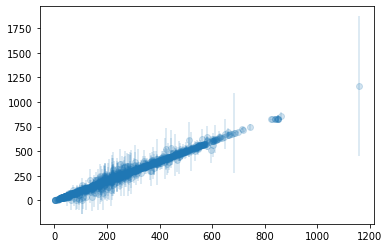

In [37]:
x=fgb_out['W/O Outlier Mean'].to_numpy()
y=fgb_out['W/O Outlier Median'].to_numpy()
e=fgb_out['W/O Outlier Std']
# figure(figsize(10,8),dpi=80)
plt.errorbar(x,y,yerr=e,fmt='o',alpha=0.2)
plt.show()

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='W/O Outlier Range', ylabel='W/O Outlier Std'>

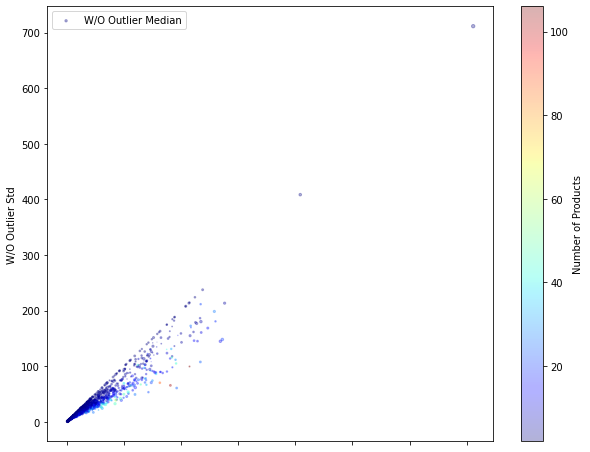

In [38]:
fgb_out.plot(kind='scatter',x='W/O Outlier Range',y='W/O Outlier Std',alpha=0.3,
        s=fgb['W/O Outlier Median']/100,label='W/O Outlier Median',figsize=(10,8),
        c='Number of Products',cmap=plt.get_cmap('jet'),colorbar=True)

<h2>Visualising Comparison of Energy Range without Outlier and With Outlier</h2>

In [39]:
fgb_out['Range Difference']=(fgb_out['Range']-fgb_out['W/O Outlier Range'])/fgb_out['Range']
fgb_out['Std Difference']=(fgb_out['Std']-fgb_out['W/O Outlier Std'])/fgb_out['Std']
temp=fgb_out[['Range','Std','W/O Outlier Range','W/O Outlier Std','Std Difference','Range Difference']]

<AxesSubplot:xlabel='Range Difference', ylabel='Std Difference'>

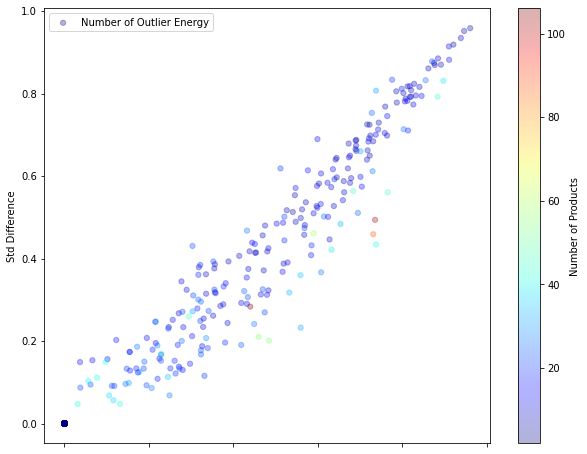

In [40]:
fgb_out.plot(kind='scatter',x='Range Difference',y='Std Difference',alpha=0.3,
        s=len(fgb['Outlier Energy'])/100,label='Number of Outlier Energy',figsize=(10,8),
        c='Number of Products',cmap=plt.get_cmap('jet'),colorbar=True)

<h2>Assigning Outliers to Data</h2>

In [41]:
fgb_assign=fgb_out[['Final Generic Product','Outlier Energy']]

In [42]:
n=0
for row in fgb_assign['Outlier Energy']:
    if len(row)==0:
        fgb_assign=fgb_assign.drop([n])
#     print(n)
    n=n+1

In [43]:
fgb_assign=fgb_assign.reset_index()

In [44]:
rang=fgb_assign['index'].tolist()
en_arr=[]
prod_arr=[]
for i in rang:
    prod=fgb_assign[fgb_assign['index']==i]['Final Generic Product'].item()
    out_arr=fgb_assign[fgb_assign['index']==i]['Outlier Energy'].item()
    for out in out_arr:
        prod_arr.append(prod)
        en_arr.append(out)

In [45]:
temp=raw[['Final Generic Product','energy_per_100g','Product name']]
temp['Identifier']=temp['Final Generic Product'].astype(str)+' '+temp['energy_per_100g'].astype(str)

<ipython-input-45-b371a6cf773c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Identifier']=temp['Final Generic Product'].astype(str)+' '+temp['energy_per_100g'].astype(str)


In [54]:
frames=[prod_arr,en_arr]
outliers=pd.DataFrame(frames).transpose()
outliers.columns=['Final Generic Product','Outlier Energy']

In [55]:
outliers['Identifier']=outliers['Final Generic Product'].astype(str)+' '+outliers['Outlier Energy'].astype(str)

In [60]:
outliers_res=outliers.merge(temp,how='left',on=['Identifier'])
outliers_res=outliers_res.drop(columns=['Final Generic Product_y', 'Identifier'])
outliers_res=outliers_res.rename(columns={"Final Generic Product_x": "Final Generic Product"})
outliers_res

,Final Generic Product,Outlier Energy,energy_per_100g,Product name
0,Snack - Peanut,2278,2278.0,Lorenz Nic Nac's BBQ
1,Garlic Sauce,1650,1650.0,Felix Kräutersauce
2,Pesto - Pomodoro,1406,1406.0,Barilla Pesto Pomodori Secchi
3,Sweet Bakery - plain - refined-grain - shelfst...,1505,1505.0,Ölz Mini Bussi Zimt
4,Sticks/Grissini - plain,1888,1888.0,Grissini mit Sesam
...,...,...,...,...
1435,Instant/Take-Away - Vegetables with Others - p...,91,91.0,Bali Brunch Rainbow Bowl
1436,Instant/Take-Away - Vegetable with Cereals - v...,76,76.0,Küchenbrüder Veganes Bio Chili sin Carne
1437,Instant/Take-Away - Vegetable with Cereals - v...,92,92.0,Iglo Ideenküche Broccoli Buchweizen
1438,Instant/Take-Away - Vegetable with Cereals - p...,205,205.0,Bali Brunch Oriental Feel good Bowl


In [61]:
outliers_res.to_csv('Outliers.csv')